In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,Normalizer,scale,StandardScaler,MinMaxScaler

from sklearn.linear_model import LogisticRegression,LinearRegression

from imblearn.over_sampling import SMOTE

In [86]:
news = pd.read_csv("OnlineNewsPopularity.csv")

In [87]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [4]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [88]:
news.columns = [i.strip() for i in news.columns]

In [89]:
news = news.drop(['timedelta','url'],axis=1)

In [90]:
news.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Title of the article
### Histogram of number of words in the title

(array([3.4000e+01, 9.8900e+02, 6.3470e+03, 1.3636e+04, 1.2259e+04,
        5.2420e+03, 1.0150e+03, 1.1300e+02, 8.0000e+00, 1.0000e+00]),
 array([ 2. ,  4.1,  6.2,  8.3, 10.4, 12.5, 14.6, 16.7, 18.8, 20.9, 23. ]),
 <a list of 10 Patch objects>)

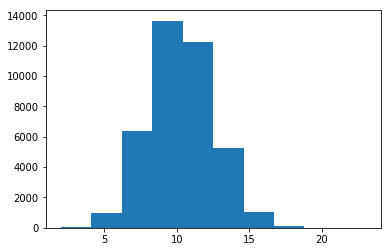

In [9]:
plt.hist(news['n_tokens_title'])

### Number of words in title vs. Shares

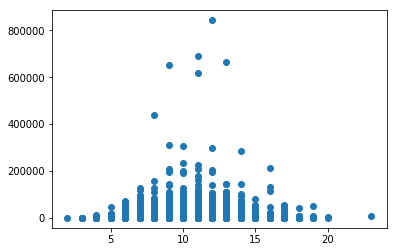

In [10]:
plt.scatter(news['n_tokens_title'],news['shares'])

The title of an article is probably the first thing that a user sees when interacting with an article. It could be the factor upon which a user decides whether to click on the link or not. Thus, shares may be influenced significantly by the length of the title, as that could lead to more views and potentially more shares. In this regard, a title may be too short or too long

# Content of the article
## Words
### Histogram of Number of words

(array([3.5351e+04, 3.7660e+03, 4.3600e+02, 6.3000e+01, 1.4000e+01,
        5.0000e+00, 7.0000e+00, 2.0000e+00]),
 array([   0.  , 1059.25, 2118.5 , 3177.75, 4237.  , 5296.25, 6355.5 ,
        7414.75, 8474.  ]),
 <a list of 8 Patch objects>)

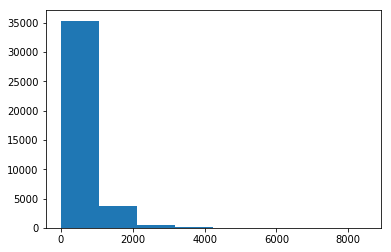

In [15]:
plt.hist(news['n_tokens_content'],bins=8)

Most of the articles in the Mashable dataset fall in the 0-1000 words zone. This makes sense given the target audience of the articles. This also indicates that the number of words in an article may not be a great predictor of the number of shares given that most of articles have a similar number of words.

### Number of words vs. Shares

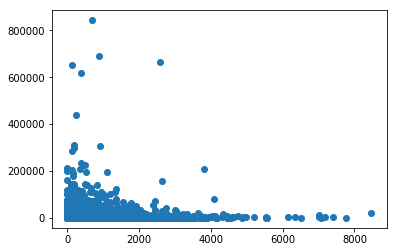

In [67]:
plt.scatter(news['n_tokens_content'],y=news['shares'])

The length of the article may also be a determining factor in whether an article gets shared or not. An article that is too long may discourage readers from finishing it and consequently decreasing the chances of resharing.

## Images

### Histogram of Number of images

(array([3.5073e+04, 3.4630e+03, 7.3800e+02, 1.9900e+02, 1.0400e+02,
        3.2000e+01, 8.0000e+00, 2.3000e+01, 3.0000e+00, 1.0000e+00]),
 array([  0. ,  12.8,  25.6,  38.4,  51.2,  64. ,  76.8,  89.6, 102.4,
        115.2, 128. ]),
 <a list of 10 Patch objects>)

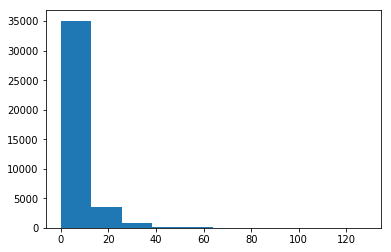

In [16]:
plt.hist(news['num_imgs'])

### Number of images vs. Shares

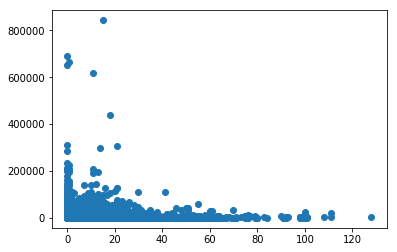

In [9]:
plt.scatter(news['num_imgs'],news['shares'])

(0, 40)

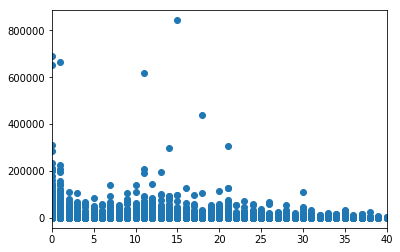

In [11]:
plt.scatter(news['num_imgs'],news['shares'])
plt.xlim(0,40)

## Videos
### Number of videos in the article vs. Shares

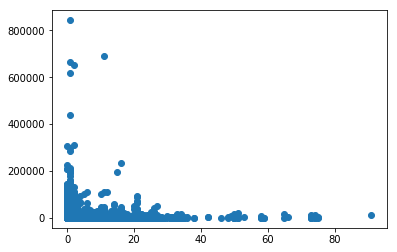

In [69]:
plt.scatter(news['num_videos'],news['shares'])

Both number of images and number of videos in the article could determine whether an article gets shared or not. In the digital age, with people's attention spans becoming shorter, articles that are succint and visual are generally the way to go. Here we can see that in the few outliers that have around and over 200,000 shares, a non-negligible amount of them possess between 10 and 20 images. However, there does appear to be a tipping point, after which increasing the number of images and/or videos leads to detrimental effect on the shares. This could be because it no longer focuses on one topic and there is no focus to the article, which could discourage users from sharing.

# Days of the week that the article is published

In [22]:
num_of_items_per_weekday = []
mean_shares_per_weekday = []
days_of_weeks = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
for i in days_of_weeks:
    que = 'weekday_is_'+i+'==1.0'
    num_of_items_per_weekday.append((i,len(news.query(que))))
    mean_shares_per_weekday.append((i,news.query(que)['shares'].mean()))

In [23]:
num_of_items_per_weekday

[('monday', 6661),
 ('tuesday', 7390),
 ('wednesday', 7435),
 ('thursday', 7267),
 ('friday', 5701),
 ('saturday', 2453),
 ('sunday', 2737)]

In [28]:
days = [x[0] for x in num_of_items_per_weekday]

In [30]:
items = [x[1] for x in num_of_items_per_weekday]

### Total number of articles published per weekday

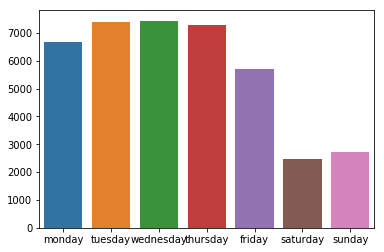

In [32]:
sns.barplot(days,items)

### Mean shares per day

In [33]:
mean_shares_per_weekday

[('monday', 3647.0258219486564),
 ('tuesday', 3202.5006765899866),
 ('wednesday', 3303.4053799596504),
 ('thursday', 3178.5991468281272),
 ('friday', 3285.181020873531),
 ('saturday', 4078.1850794944967),
 ('sunday', 3746.7405918889294)]

There is a non-negligible increase in the number of shares on Saturday and Sunday when compared to the remaining days of the week. Also, Monday has a higher mean shares than the other weekdays.

In [34]:
shares = [y[1] for y in mean_shares_per_weekday]

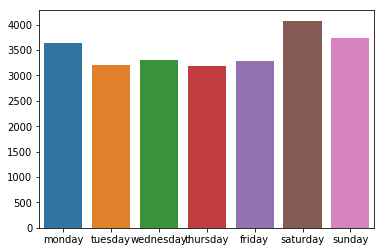

In [35]:
sns.barplot(days,shares)

# Channel that the article is published in

In [38]:
num_of_items_per_channel = []
mean_shares_per_channel = []
channel = ['lifestyle','bus','entertainment','socmed','tech','world']
for i in channel:
    que = 'data_channel_is_'+i+'==1.0'
    num_of_items_per_channel.append((i,len(news.query(que))))
    mean_shares_per_channel.append((i,news.query(que)['shares'].mean()))

In [39]:
num_of_items_per_channel

[('lifestyle', 2099),
 ('bus', 6258),
 ('entertainment', 7057),
 ('socmed', 2323),
 ('tech', 7346),
 ('world', 8427)]

In [40]:
mean_shares_per_channel

[('lifestyle', 3682.123392091472),
 ('bus', 3063.0185362735697),
 ('entertainment', 2970.487034150489),
 ('socmed', 3629.383125269049),
 ('tech', 3072.283283419548),
 ('world', 2287.734069063724)]

In [41]:
channel = [x[0] for x in num_of_items_per_channel]

In [42]:
items_per_channel = [x[1] for x in num_of_items_per_channel]

In [44]:
shares_p_channel = [y[1] for y in mean_shares_per_channel]

### Number of articles published per channel

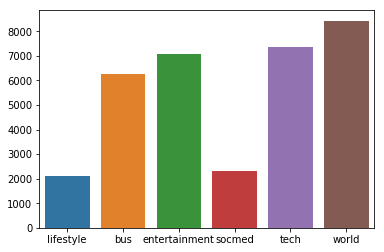

In [43]:
sns.barplot(channel,items_per_channel)

### Mean shares per channel

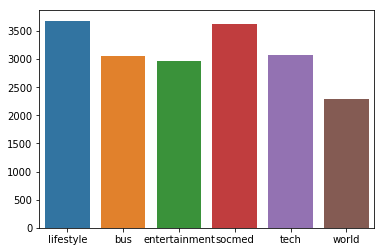

In [46]:
sns.barplot(channel,shares_p_channel)

People like sharing lifestyle and social media articles substantially more than the other channels. This could be due to many reasons including: the websites userbases' disposition/preference for these topics, the lack of visibility of these topics on the website (i.e. less visitors to these pages), or that these articles are inherently less shareable than their lifestyle and social media counterparts.

In [2]:
?normalize

In [29]:
news['shares'].mean()

3395.3801836343455

In [30]:
news['shares'].median()

1400.0

In [51]:
len(news.query('shares>10000'))

2185

In [49]:
len(news.query('shares<5000'))

34464

# Preparing data for modelling

In [10]:
news.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Setting a threshold for classification

In [92]:
popular = news.shares >= 10000
unpopular = news.shares < 10000

In [93]:
news.loc[popular,'shares']=1
news.loc[unpopular,'shares']=0

In [94]:
news['shares'].head()

0    0
1    0
2    0
3    0
4    0
Name: shares, dtype: int64

In [95]:
news['shares'].value_counts()

0    37429
1     2215
Name: shares, dtype: int64

### Creating feature set and target

In [133]:
y = news['shares']

In [97]:
features = list(news.columns[0:58])

In [98]:
features[0:5]

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens']

In [132]:
X = news[features]

### Splitting dataset into train and test sets

In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [136]:
X_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
37315,13.0,475.0,0.552239,1.0,0.773234,3.0,2.0,2.0,0.0,4.901053,...,0.392945,0.062500,1.0,-0.214028,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000
10590,9.0,525.0,0.568093,1.0,0.778878,5.0,1.0,1.0,0.0,4.361905,...,0.364123,0.100000,1.0,-0.239807,-0.800000,-0.050000,1.000000,0.500000,0.500000,0.500000
3127,9.0,719.0,0.576369,1.0,0.752294,5.0,3.0,1.0,20.0,4.657858,...,0.450932,0.100000,1.0,-0.350541,-0.714286,-0.100000,0.500000,0.500000,0.000000,0.500000
5541,10.0,100.0,0.785714,1.0,0.931034,7.0,4.0,0.0,0.0,4.730000,...,0.443333,0.166667,0.8,0.000000,0.000000,0.000000,0.375000,-0.125000,0.125000,0.125000
3047,9.0,365.0,0.664804,1.0,0.784810,16.0,3.0,1.0,0.0,4.942466,...,0.243879,0.100000,0.5,-0.339583,-0.700000,-0.066667,0.727273,-0.431818,0.227273,0.431818


### Splitting train into train and validation sets

In [137]:
Xtrain,Xval,ytrain,yval = train_test_split(X_train,y_train,test_size=0.2)

In [138]:
np.bincount(ytrain)

array([23942,  1430])

### Method 1: Scaling first, then oversampling - Logistic Regression

In [105]:
X_scaled = scale(Xtrain)

In [106]:
X_scaled

array([[-0.66103859,  2.36395328, -0.0359538 , ...,  0.23993724,
        -1.57427296, -0.09312901],
       [-0.18705608,  1.9436905 , -0.03462701, ..., -0.27018454,
         0.83715808, -0.69200942],
       [-0.66103859, -0.35815487,  0.01247717, ...,  1.60026202,
        -1.81541607,  1.50388543],
       ...,
       [ 1.23489145,  0.55916998, -0.02169239, ..., -0.27018454,
         0.83715808, -0.69200942],
       [-0.66103859,  1.77942535, -0.02224418, ..., -0.27018454,
         0.83715808, -0.69200942],
       [-0.66103859,  0.63383596, -0.01538936, ...,  0.10390477,
         0.30664325, -0.25283045]])

In [107]:
sm_1 = SMOTE(ratio=1.0)

In [108]:
X_so,y_so = sm_1.fit_sample(X_scaled,ytrain)

In [113]:
lg_1 = LogisticRegression()

In [115]:
lg_1.fit(X_so,y_so)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
lg_1.score(Xval,yval)

0.16679804508907456

### Method 2: Oversampling minority class then scaling - Logistic Regression

In [139]:
sm_2 = SMOTE(ratio=1.0)

In [118]:
print(ytrain.value_counts())

0    23945
1     1427
Name: shares, dtype: int64


In [140]:
X_res,y_res = sm_2.fit_sample(Xtrain,ytrain)

In [141]:
np.bincount(y_res)

array([23942, 23942])

In [147]:
lg_2 = LogisticRegression()

In [148]:
lg_2.fit(X_res,y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
lg_2.score(Xval,yval)

0.6878448683588207

### Method 3: Scaling oversampled X - Logistic Regression

In [142]:
X_res_scaled = scale(X_res)

In [150]:
lg_3 = LogisticRegression()

In [151]:
lg_3.fit(X_res_scaled,y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
lg_3.score(Xval,yval)

0.6457512218193284

### Using Logistic Regression

In [52]:
lg = LogisticRegression()

In [53]:
lg.fit(X_res,y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
lg.score(Xval,yval)

0.6823269746176888

### Scaling features

In [55]:
X_res_scaled = scale(X_res)

In [56]:
lg_2 = LogisticRegression()

In [57]:
lg_2.fit(X_res_scaled,y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
lg_2.score(Xval,yval)

0.9405644017026643